In [1]:
import pandas as pd
import json
import warnings
warnings.filterwarnings("ignore")

# calc
import numpy as np

# plot
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

# Plot functions

In [2]:
# define colors
colors = ['#E64B35FF', '#4DBBD5FF', '#00A087FF', \
          '#3C5488FF', '#F39B7FFF', '#8491B4ff',\
          '#91D1C2FF', '#DC0000FF', '#7E6148FF']

# 19 colors for industry drawing
with open('fig/colors_19.json') as f:
    colors_19 = json.load(f)

# define font size
label_size = 12
font_size = 8

# calc annotations
def format_with_commas(value, pos):
    return '{:,.0f}'.format(value)

## Plot b

In [3]:
def plot_b(ax):
    df_pic = pd.read_csv('./data/entrepreneurship_industry_nspc.csv')

    # delete international organizations bacause of the lack of data
    industry_list = ['Agriculture', 'Mining', 'Manufacturing', 'Power & Water Supply', 'Construction', 'Wholesale & Retail', 'Transportation & Postal',\
        'Accommodation & Catering', 'Information Services', 'Finance', 'Real Estate', 'Leasing & Business', 'Research & Technology', 'Water & Environment', \
            'Residential & Other Services', 'Education', 'Healthcare', 'Culture & Entertainment', 'Public Administration']

    # sort
    y_data = []
    for v,i in enumerate(industry_list):
        df_temp_industry = df_pic[df_pic['Industry']==i].sort_values(by='StartUpTimeInterval')
        y = df_temp_industry['NSPC'].to_list()
        y_data.append((industry_list[v], y))

    # chosen marker
    marker_list = ["o", "v", "^", "<", ">", "1", "2", "3", "4", "s", "p", "P", "*", "h", "H", "+", "x", "D", "|", "_"]
    y_data.sort(key=lambda x: x[1][0], reverse=True)
    label_list = [i[0] for i in y_data]
    x_data = df_pic['StartUpTimeInterval'].unique().tolist()
    y_data_list = [i[1] for i in y_data]

    df = pd.DataFrame({item[0]: item[1] for item in y_data})

    # calc ranking
    rank_df = df.rank(axis=1, ascending=False)
    top10_first_5years = []
    for col in rank_df.columns:
        if rank_df.loc[0, col] <= 10:
            top10_first_5years.append(col)


    line_dict = {}
    alpha = 0.75
    linewidth = 3

    for v, y_data in enumerate(y_data_list[:]):
        if label_list[v] not in top10_first_5years and label_list[v] != 'Education':
            line_dict[label_list[v]], = ax.plot(x_data, y_data, label=label_list[v], alpha=alpha, linewidth=linewidth, color=colors_19[v], marker=marker_list[v], markersize=10)

    for v, y_data in enumerate(y_data_list[:]):
        if label_list[v] in top10_first_5years:
            line_dict[label_list[v]], = ax.plot(x_data, y_data, label=label_list[v], alpha=alpha, linewidth=linewidth, color=colors_19[v], marker=marker_list[v], markersize=10)

    for v, y_data in enumerate(y_data_list[:]):
        if label_list[v] == 'Education':
            line_dict[label_list[v]], = ax.plot(x_data, y_data, label=label_list[v], alpha=1, linewidth=linewidth, color=colors_19[v], marker=marker_list[v], markersize=10)

    handles = [line_dict[ind] for ind in label_list]
    labels = [ind for ind in label_list]

    ax.set_ylabel('NSPC', fontsize=label_size)
    ax.set_xlabel('Time Interval', fontsize=label_size)
    ax.tick_params(axis='x', labelsize=font_size)
    ax.tick_params(axis='y', labelsize=font_size)

    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.01, 0.5), borderaxespad=0., fontsize=font_size)
    ax.grid(linestyle='--', alpha=0.3)

In [4]:
def plot_c(ax):
    grouped_par_wage = pd.read_csv('./data/census_parent_wage_nspc.csv')

    x_labels = ['', '200-400', '', '600-800', '', '>1000']

    # bar
    ax2 = ax.twinx()
    bars = ax2.bar(grouped_par_wage['par_wage_group'], grouped_par_wage['count'], color=colors[6], edgecolor="k", alpha=0.2)
    ax2.set_ylabel('Number of People', fontsize=label_size)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    ax2.tick_params(axis='y', labelsize=font_size)

    # line
    ax.plot(grouped_par_wage['par_wage_group'], grouped_par_wage['mean'], marker='o', color=colors[3], linestyle='-', markersize=8)
    ax.set_ylabel('NSPC', fontsize=label_size)
    ax.set_xticklabels(x_labels, rotation=0, fontsize=font_size)
    ax.set_xlabel('Salary Group', fontsize=label_size)
    ax.tick_params(axis='y', labelsize=font_size)
    ax.set_ylim(8.2,9.3)

    # annotations
    for x, y in zip(grouped_par_wage['par_wage_group'], grouped_par_wage['mean']):
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 4), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=colors[-1])

    ax.tick_params(axis='x', labelsize=font_size) 
    ax.grid(linestyle='--', alpha=0.3)
    
    plt.tight_layout()

In [5]:
def plot_d(ax):
    grouped_par_edu = pd.read_csv('./data/census_parent_edu_nspc.csv')
    grouped_par_edu_ticks = [
        'Not in\nEducation',
        'Primary\nSchool',
        'Middle\nSchool',
        'High\nSchool',
        'Associate\nDegree',
        'Bachelor\nDegree',
        'Graduate\nand Above'
    ]

    # bar
    ax2 = ax.twinx()
    bars = ax2.bar(grouped_par_edu['par_edu_group'], grouped_par_edu['count'], color=colors[6], edgecolor="k", alpha=0.2)
    ax2.set_ylabel('Number of People', fontsize=label_size)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    ax2.tick_params(axis='y', labelsize=font_size) 

    # line
    ax.plot(grouped_par_edu['par_edu_group'], grouped_par_edu['mean'], marker='o', color=colors[4], linestyle='-', markersize=8, label='# People')
    ax.set_ylabel('NSPC', fontsize=label_size)
    ax.set_xlabel('Education Group', fontsize=label_size)
    ax.set_xticklabels(grouped_par_edu_ticks, rotation=0)
    ax.set_ylim(7.7,9.4)
    ax.tick_params(axis='y', labelsize=font_size) 

    # annotation
    for x, y in zip(grouped_par_edu['par_edu_group'], grouped_par_edu['mean']):
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 4), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=colors[-1])

    ax.tick_params(axis='x', labelsize=7) 
    ax.grid(linestyle='--', alpha=0.3)
    
    plt.tight_layout()

In [6]:
def plot_e(ax):
	parent_child_nspc = pd.read_csv('./data/census_parent_child_nspc.csv')
	bins = [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, np.inf]
	labels = ['1-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '>15']
	x_labels = ['1-4', '', '5-6', '', '7-8', '', '9-10', '', '11-12', '', '13-14', '', '>15']

	parent_child_nspc['ParentNSPCInterval'] = pd.cut(parent_child_nspc['ParentNSPC'], bins=bins, labels=labels, right=False)
	line_nspc = parent_child_nspc.groupby('ParentNSPCInterval')['NSPC'].mean()
	bar_nspc = parent_child_nspc['ParentNSPCInterval'].value_counts().sort_index()
	y_line, y_bar, x_label, line_color = line_nspc.values, bar_nspc.values, labels, colors[0]

	ax.plot(x_label, y_line, marker='o', color=line_color, linestyle='-', markersize=8)
	ax.set_ylabel('Children\'s NSPC', fontsize=label_size)

	# Line chart annotations
	for x, y in zip(x_label, y_line):
		ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 4), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=colors[-1])

	# Bar chart on ax2
	ax2 = ax.twinx()
	ax2.bar(x_label, y_bar, color=colors[6], edgecolor="k", alpha=0.2)
	ax2.set_ylabel(f'Number of People', fontsize=label_size)
	ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))

	ax.set_xlabel('Parents\' NSPC', fontsize=label_size)
	ax.set_xticks(x_label)
	ax.set_xticklabels(x_labels, rotation=0, fontsize=font_size)

	ax.tick_params(axis='y', labelsize=font_size)
	ax2.tick_params(axis='y', labelsize=font_size)
	ax.set_ylim(7.85,9)

	ax.grid(linestyle='--', alpha=0.3)
	plt.tight_layout()

In [7]:
def plot_f(ax):
    start = 600
    end = 1900
    interval_width = 100

    # original dynasty information
    dynasties = [
        ('', 'Tang', 618, 907),
        ('', 'Song', 960, 1271),
        ('', 'Yuan', 1271, 1368),
        ('', 'Ming', 1368, 1644),
        ('', 'Qing', 1644, 1912)
    ]

    # calculate offset
    dynasties_positions = []
    for dynasty in dynasties:
        start_position = (dynasty[2] - start) / interval_width
        end_position = (dynasty[3] - start) / interval_width
        dynasties_positions.append((dynasty[0], dynasty[1], start_position, end_position))

    left_y_max = 12.5
    line_alpha = 0.3

    # fig, ax = plt.subplots()
    df_cbdb = pd.read_csv('./data/cbdb_birthyear_nspc.csv')

    # Background annotations for dynasty
    for idx, dynasty in enumerate(dynasties_positions):
        # add shadow
        x_start, x_end = dynasty[2], dynasty[3]
        ax.axvspan(x_start, x_end, ymin=0, ymax=1, facecolor='gray', alpha=0.05)
        # add dynasty text
        x_center = (x_start + x_end) / 2
        ax.annotate(dynasty[1],  xy=(x_center, left_y_max), xytext=(0, -1.75), textcoords='offset points', ha='center', va='top', fontsize=font_size)#, weight='bold')
        # add lines
        ax.axvline(x=x_start, color='gray', linestyle='-', alpha=line_alpha, linewidth=1)
        if idx == len(dynasties_positions) - 1:
            ax.axvline(x=x_end, color='gray', linestyle='-', alpha=line_alpha, linewidth=1)
        elif x_end != dynasties_positions[idx + 1][2]:
            ax.axvline(x=x_end, color='gray', linestyle='-', alpha=line_alpha, linewidth=1)

    column_a, column_b = 'c_index_year', 'NSPC'
    intervals = [int(i) for i in range(start, end + interval_width, interval_width)]
    df_cbdb['interval'] = pd.cut(df_cbdb[column_a], bins=intervals, include_lowest=True, right=False)
    line_cbdb = df_cbdb.groupby('interval')[column_b].mean()
    bar_cbdb = df_cbdb['interval'].value_counts().sort_index()
    x_label_cbdb = [str(i.left) + '-' + str(i.right) for i in line_cbdb.index.tolist()]
    y_line, y_bar, x_label, line_color, x_label_name = line_cbdb.values, bar_cbdb.values, x_label_cbdb, colors[0], 'Birth Year Interval'

    ax.plot(x_label, y_line, marker='o', color=line_color, linestyle='-', markersize=8)
    ax.set_ylabel('NSPC', fontsize=label_size)
    ax.set_xlabel('Time Interval', fontsize=label_size)

    # Line chart annotations
    for x, y in zip(x_label, y_line):
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 4), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color='#7E6148FF')

    # Bar chart on ax2
    ax2 = ax.twinx()
    ax2.bar(x_label, y_bar, color=colors[6], edgecolor="k", alpha=0.2)
    ax2.set_ylabel(f'Number of People', fontsize=label_size)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))

    ax.set_xlabel(x_label_name, fontsize=label_size)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, rotation=45, fontsize=font_size)
    ax.set_ylim(10.3, left_y_max)
    ax.tick_params(axis='y', labelsize=font_size)

    ax2.set_ylim(0, 47000)
    ax2.tick_params(axis='y', labelsize=font_size)

    plt.tight_layout()

In [8]:
def plot_g(ax):
    df_gender_census = pd.read_csv('./data/census_birthyear_nspc.csv')
    df_gender_census_female = df_gender_census.query("female==1")
    df_gender_census_male = df_gender_census.query("female==0")
    female_data = df_gender_census_female.groupby(['interval'])['NSPC'].mean()
    male_data = df_gender_census_male.groupby(['interval'])['NSPC'].mean()
    all_data = df_gender_census.groupby(['interval'])['NSPC'].mean()
    bar_data = df_gender_census.groupby(['interval'])['count'].sum()
    temp = df_gender_census_female.groupby(['interval'])['NSPC'].mean().reset_index()
    x_label = [i[1:5] + '-' + i[-5:-1] for i in temp['interval'].tolist()]

    ax.plot(x_label, female_data, label='Female', marker='^', color=colors[0])
    ax.plot(x_label, male_data, label='Male', marker='o', color=colors[3])
    ax.plot(x_label, all_data, label='All', marker='*', color=colors[-1])
    ax.set_ylabel('NSPC', fontsize=label_size)
    ax.set_xlabel('Time Interval', fontsize=label_size)
    ax.set_xticklabels(x_label, rotation=45, fontsize=font_size)

    ax.legend(fontsize=font_size)
    ax.grid(linestyle='--', alpha=0.3)

    ax2 = ax.twinx()
    ax2.bar(x_label, bar_data, color=colors[6], edgecolor="k", alpha=0.2)
    ax2.set_ylabel(f'Number of People', fontsize=label_size)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    
    ax.tick_params(axis='y', labelsize=font_size)
    ax2.tick_params(axis='y', labelsize=font_size)

# Combine all the figures

FileNotFoundError: [Errno 2] No such file or directory: './data/entrepreneurship_industry_nspcs.csv'

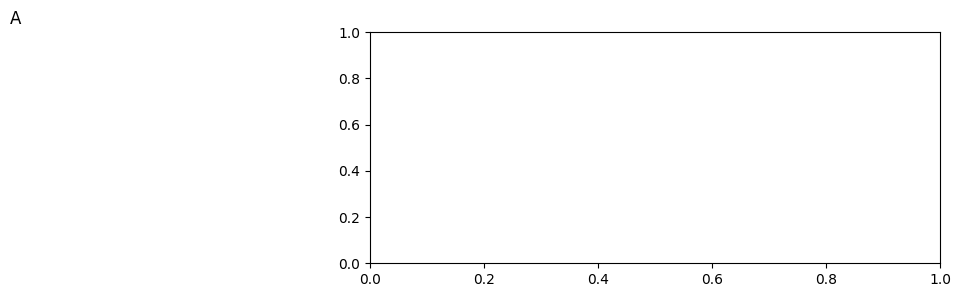

In [9]:
fig = plt.figure(figsize=(12, 12))
label_size = 12
font_size = 8

gs = gridspec.GridSpec(10, 6, wspace=5, hspace=2)

ax1 = plt.subplot(gs[:1, :2])
ax1.axis('off')
ax1.set_title('A', loc='left') 

ax2 = plt.subplot(gs[:3, 2:])
plot_b(ax2)
ax2.set_title('B', loc='left') 

ax3 = plt.subplot(gs[1:3, :2])
plot_c(ax3)
ax3.set_title('C', loc='left') 

ax4 = plt.subplot(gs[3:5, :3])
plot_d(ax4)
ax4.set_title('D', loc='left') 

ax5 = plt.subplot(gs[3:5, 3:])
plot_e(ax5)
ax5.set_title('E', loc='left') 

ax6 = plt.subplot(gs[5:7, :3])
plot_f(ax6)
ax6.set_title('F', loc='left') 

ax7 = plt.subplot(gs[5:7, 3:])
plot_g(ax7)
ax7.set_title('G', loc='left') 

plt.tight_layout(pad=0.5)
filename = 'combination'
plt.savefig(f'fig/{filename}.pdf', format='pdf', bbox_inches='tight')
plt.show();